In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

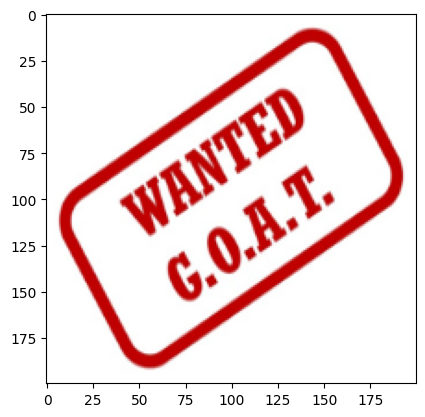

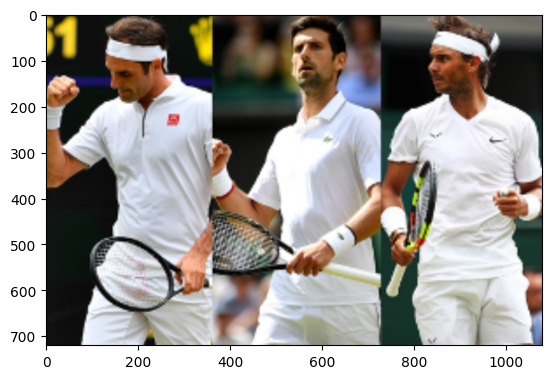

In [2]:
sample_img = cv2.imread('./data/ex_image.png')
sample_logo = cv2.imread('./data/ex_image_logo.png')

img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

img = cv2.resize(img, (1080,720))
small_img = cv2.resize(watermark, (200,200))

plt.imshow(small_img)
plt.show()

plt.imshow(img)
plt.show()

# watermark 삽입할 위치값 구하고 잘라내기

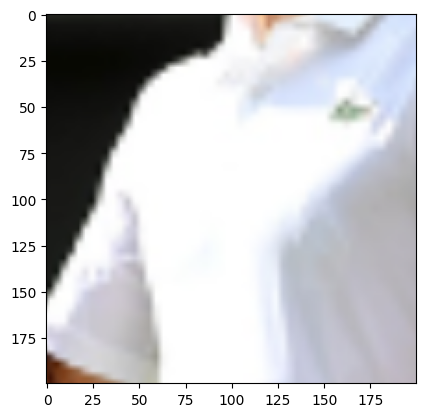

In [3]:
height, width, channel = small_img.shape

x_offset = 450
y_offset = 220

roi = img[y_offset:420, x_offset:650]

plt.imshow(roi)
plt.show()

# 검은 로고 생성

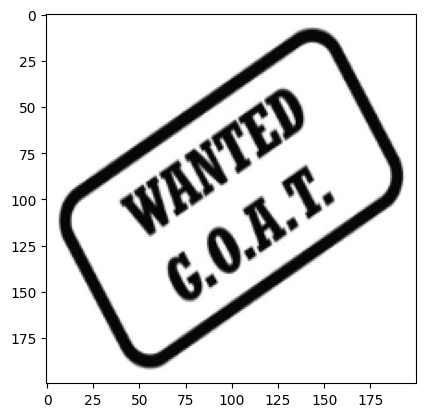

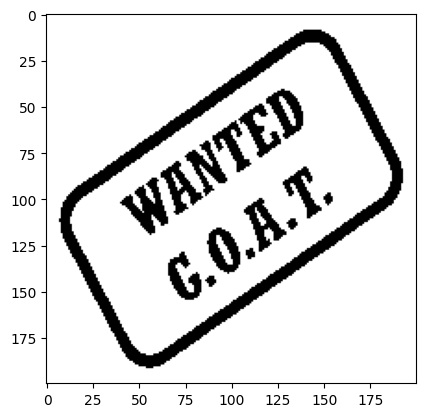

In [4]:
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)
plt.imshow(small_img_gray, 'gray')
plt.show()

# 회색 -> 검은색으로 만들기
ret, mask = cv2.threshold(small_img_gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(mask, 'gray')
plt.show()

# ROI 와 마스크 OR 하기

(200, 200, 3) (200, 200)


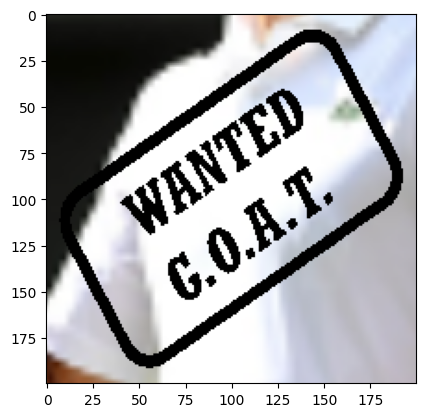

In [5]:
print(roi.shape,mask.shape)
bg = cv2.bitwise_or(roi, roi, mask=mask)

plt.imshow(bg)
plt.show()

# 마커의 빨간색을 다시 가져오기 위한 반전

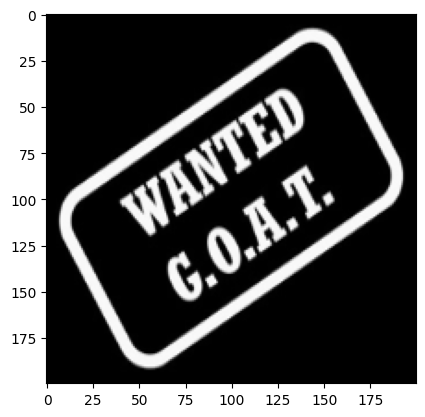

In [7]:
mask_inv = cv2.bitwise_not(small_img_gray)

plt.imshow(mask_inv, 'gray')
plt.show()

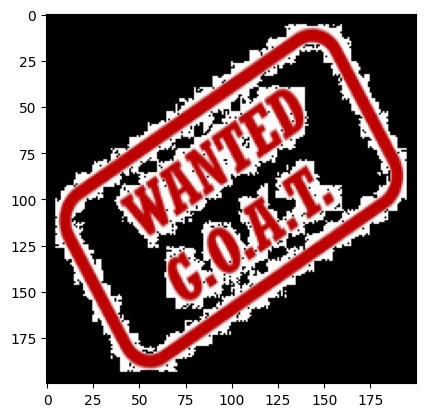

In [8]:
mask_red = cv2.bitwise_and(small_img, small_img, mask=mask_inv)

plt.imshow(mask_red)
plt.show()

# 붉은 마크 붙여넣기

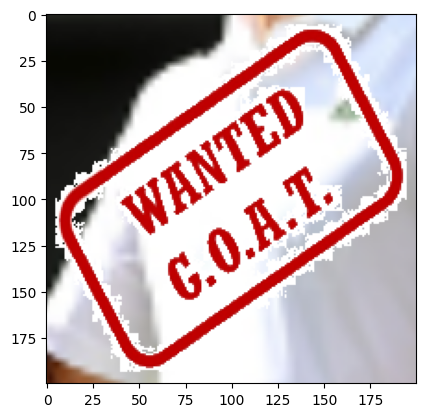

In [9]:
final_roi = cv2.add(bg, mask_red)

plt.imshow(final_roi)
plt.show()

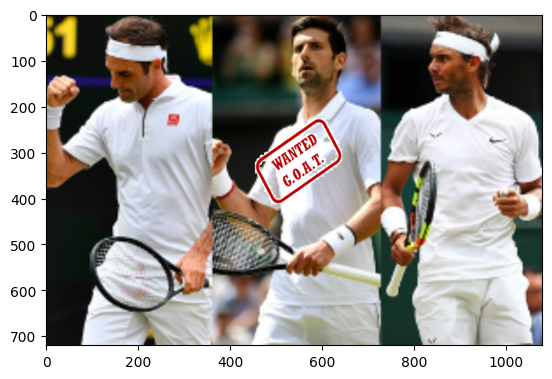

In [11]:
small_img = final_roi
img[y_offset:y_offset + small_img.shape[0], x_offset:x_offset + small_img.shape[1]] =small_img

plt.imshow(img)
plt.show()